### Contents
    1. Importing libraries and data
    2. Data check
    3. Data prep for regression analysis
    3. Regression analysis
    4. Performance improvement after removing outliers  

# 01. Importing libraries and data

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Importing data 
path=r'C:\Users\munav\Desktop\bootcamps\Achievement 6\US Car Accidents'
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'US_Car_Accidents_clean.pkl'))
sub_day=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'City_accidents_per_day.pkl'))
sub_hour=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'City_accidents_per_hour.pkl'))

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
#Checking the imported data
df.shape

(2304260, 37)

In [5]:
df.head()

,ID,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),City,County,State,Temperature(F),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Region,Year,Month,Hour,Weather,Licensed_Drivers
0,A-1,3,2016-02-08 00:37:08,40.108910,-83.092860,3.230,Dublin,Franklin,Ohio,42.099998,...,False,False,False,Night,Midwest,2016,2,1,Light,7974951.0
1,A-2,2,2016-02-08 05:56:20,39.865420,-84.062800,0.747,Dayton,Montgomery,Ohio,36.900002,...,False,False,False,Night,Midwest,2016,2,6,Light,7974951.0
2,A-3,2,2016-02-08 06:15:39,39.102660,-84.524680,0.055,Cincinnati,Hamilton,Ohio,36.000000,...,False,False,False,Night,Midwest,2016,2,6,Light,7974951.0
3,A-4,2,2016-02-08 06:51:45,41.062130,-81.537840,0.123,Akron,Summit,Ohio,39.000000,...,False,False,False,Night,Midwest,2016,2,7,Light,7974951.0
4,A-5,3,2016-02-08 07:53:43,39.172393,-84.492792,0.500,Cincinnati,Hamilton,Ohio,37.000000,...,False,False,False,Day,Midwest,2016,2,8,Light,7974951.0


In [6]:
sub_day.shape

(1001551, 14)

In [7]:
sub_day.head()

,Date,State,County,City,City_accidents_per_day,Avg_temp_per_day,Avg_humid_per_day,Avg_pressure_per_day,Avg_visibility_per_day,Avg_windmph_per_day,Avg_precip_per_day,Avg_distance_per_day,Avg_severity_per_day,_merge
0,2016-01-14,Pennsylvania,Lehigh,Whitehall,1,31.000000,69.0,29.530001,10.0,3.0,0.0,0.061,4.0,both
1,2016-02-08,Indiana,Allen,Roanoke,1,28.000000,88.0,29.709999,8.0,16.1,0.0,0.477,2.0,both
2,2016-02-08,Kentucky,Kenton,Ft Mitchell,1,26.600000,80.0,29.730000,3.0,13.8,0.0,0.471,3.0,both
3,2016-02-08,Ohio,Allen,Lima,1,39.000000,70.0,29.590000,10.0,11.5,NaN,0.491,2.0,both
4,2016-02-08,Ohio,Clermont,Williamsburg,1,35.599998,100.0,29.660000,10.0,8.1,NaN,1.427,2.0,both


In [8]:
sub_hour.shape

(1749243, 16)

In [9]:
sub_hour.head()

,Date,Hour,State,County,City,City_accidents_per_hour,Avg_temp_per_hour,Avg_humid_per_hour,Avg_pressure_per_hour,Avg_visibility_per_hour,Avg_windmph_per_hour,Avg_precip_per_hour,Avg_distance_per_hour,Avg_severity_per_hour,_merge,Temp_category
0,2016-01-14,20,Pennsylvania,Lehigh,Whitehall,1,31.000000,69.0,29.530001,10.0,3.0,0.00,0.061,4.0,both,Very Cold
1,2016-02-08,1,Ohio,Franklin,Dublin,1,42.099998,58.0,29.760000,10.0,10.4,0.00,3.230,3.0,both,Normal
2,2016-02-08,6,Ohio,Hamilton,Cincinnati,1,36.000000,97.0,29.700001,10.0,NaN,0.02,0.055,2.0,both,Normal
3,2016-02-08,6,Ohio,Montgomery,Dayton,1,36.900002,91.0,29.680000,10.0,NaN,0.02,0.747,2.0,both,Normal
4,2016-02-08,7,Ohio,Summit,Akron,1,39.000000,55.0,29.650000,10.0,NaN,NaN,0.123,2.0,both,Normal


# 02. Data check

#### The data was checked for mixed data types and duplicate values in previous exercises.

In [10]:
#Check for missing values
sub_hour.isnull().sum()

Date                            0
Hour                            0
State                           0
County                          0
City                            0
City_accidents_per_hour         0
Avg_temp_per_hour           45882
Avg_humid_per_hour          48284
Avg_pressure_per_hour       39407
Avg_visibility_per_hour     47355
Avg_windmph_per_hour       115264
Avg_precip_per_hour        283681
Avg_distance_per_hour           0
Avg_severity_per_hour           0
_merge                          0
Temp_category               45882
dtype: int64

In [11]:
sub_hour=sub_hour.dropna(subset=['Avg_temp_per_hour', 'Avg_visibility_per_hour' ])

In [12]:
sub_hour.shape

(1694728, 16)

C:\Users\munav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg_temp_per_hour', ylabel='Density'>

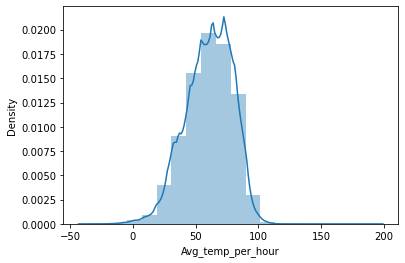

In [13]:
#Checking for extreme variables
sns.distplot(sub_hour['Avg_temp_per_hour'], bins=20)

C:\Users\munav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City_accidents_per_hour', ylabel='Density'>

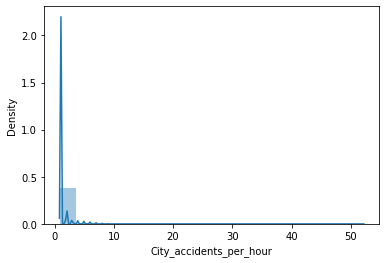

In [14]:
sns.distplot(sub_hour['City_accidents_per_hour'], bins=20)

# 03. Data prep for regression analysis

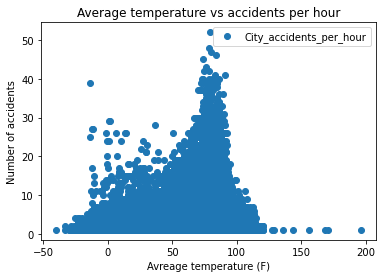

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

sub_hour.plot(x = 'Avg_temp_per_hour', y='City_accidents_per_hour',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Average temperature vs accidents per hour')  
plt.xlabel('Avreage temperature (F)')  
plt.ylabel('Number of accidents')  
plt.show()

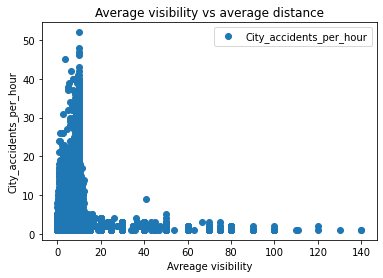

In [16]:
sub_hour.plot(x = 'Avg_visibility_per_hour', y='City_accidents_per_hour',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Average visibility vs average distance')  
plt.xlabel('Avreage visibility')  
plt.ylabel('City_accidents_per_hour')  
plt.show()

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = sub_hour['Avg_temp_per_hour'].values.reshape(-1,1)
y = sub_hour['City_accidents_per_hour'].values.reshape(-1,1)

In [18]:
X

array([[31. ],
       [42.1],
       [36. ],
       ...,
       [69. ],
       [77. ],
       [56. ]], dtype=float32)

In [19]:
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [2],
       [1]], dtype=int64)

In [20]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 04. Regression analysis

In [21]:
# Create a regression object.

regression = LinearRegression()

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

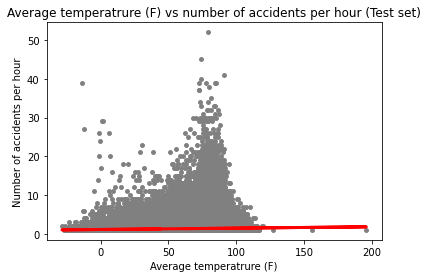

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Average temperatrure (F) vs number of accidents per hour (Test set)')
plot_test.xlabel('Average temperatrure (F)')
plot_test.ylabel('Number of accidents per hour')
plot_test.show()

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00347333]]
Mean squared error:  1.0876019021291794
R2 score:  0.003851034799921771


#### The slope is 0.0034 which is economically insignificant. The Mean squared error seems to be small, but seeing that most of the numbers of accidents are around 1-3, it is a pretty high value. R2 score of 0.0038 means that the model explains only 0.3% of the variation in the variable, which is an extremely low indicator. Overall, we can state that this model is a poor fit.

In [27]:
y_predicted

array([[1.3284514],
       [1.4104221],
       [1.4191054],
       ...,
       [1.2992755],
       [1.2645421],
       [1.2645421]], dtype=float32)

In [28]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5,1.328451
1,1,1.410422
2,2,1.419105
3,1,1.233282
4,1,1.226336
5,1,1.351375
6,3,1.284224
7,1,1.335398
8,1,1.320115
9,1,1.288855


#### The comparison of actual and predicted values proves that the model does a poor job at predicting the number of car accidents.

In [29]:
# Predicting the training dataset to compare it to testing dataset to check if the model is overfitted

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00347333]]
Mean squared error:  1.085678225677635
R2 score:  0.003836175930242436


#### We can see that the model performance statistics for the training dataset is almost similar to the testing dataset and the model is not overfitted. The model does a poor job at explaining the variations in car accidents number. We can assume that the temperature itself does not explain the variations in car accidents number, there other factors which should be included into the model.

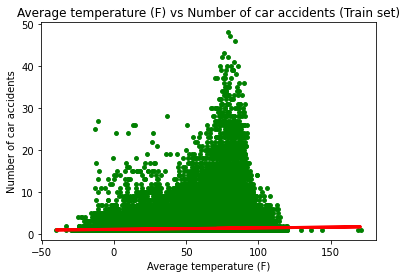

In [32]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Average temperature (F) vs Number of car accidents (Train set)')
plot_test.xlabel('Average temperature (F)')
plot_test.ylabel('Number of car accidents')
plot_test.show()

#### New Hypothesis to test: The data exploration in previous exercises has led to another hypothesis to test: Proportion of severe accidents increases as the weather worsens (precipitation increases, temperature is too hot or too cold and etc).

In [33]:
#Subsetting the data with severe(severity-4) accidents per hour in each city
sub_severe=df.loc[df['Severity']==4]
sub_severe.shape

(108671, 37)

In [34]:
sub_severe.head()

,ID,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),City,County,State,Temperature(F),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Region,Year,Month,Hour,Weather,Licensed_Drivers
19,A-20,4,2016-02-08 21:00:17,41.679361,-83.573037,0.978,Toledo,Lucas,Ohio,33.400002,...,False,False,False,Night,Midwest,2016,2,21,Light,7974951.0
26,A-27,4,2016-02-09 07:28:15,39.775720,-84.048150,2.484,Fairborn,Greene,Ohio,23.000000,...,False,False,False,Night,Midwest,2016,2,7,Moderate,7974951.0
39,A-40,4,2016-02-09 15:33:59,40.156298,-83.018431,0.206,Lewis Center,Delaware,Ohio,26.600000,...,False,False,False,Day,Midwest,2016,2,16,Moderate,7974951.0
42,A-43,4,2016-02-09 18:20:58,40.451120,-85.150480,6.690,Dunkirk,Jay,Indiana,19.900000,...,False,False,False,Night,Midwest,2016,2,18,Moderate,4553259.0
43,A-44,4,2016-02-09 18:20:58,40.354290,-85.149930,6.690,Redkey,Jay,Indiana,19.900000,...,False,False,False,Night,Midwest,2016,2,18,Moderate,4553259.0


In [35]:
sub_severe['Date']=sub_severe['Start_Time'].dt.date

C:\Users\munav\AppData\Local\Temp\ipykernel_40012\1784756268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_severe['Date']=sub_severe['Start_Time'].dt.date


In [36]:
#Grouping data to calculate the number of severe accidents
sub_severe['Date']=sub_severe['Date'].astype('datetime64')
sub_severe_grouped=sub_severe.groupby(['Date', 'Hour', 'State', 'County'])['City'].value_counts().reset_index(name='Severe_accidents_number')
sub_severe_grouped.head()

C:\Users\munav\AppData\Local\Temp\ipykernel_40012\2312094699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_severe['Date']=sub_severe['Date'].astype('datetime64')


,Date,Hour,State,County,City,Severe_accidents_number
0,2016-01-14,20,Pennsylvania,Lehigh,Whitehall,1
1,2016-02-08,21,Ohio,Lucas,Toledo,1
2,2016-02-09,7,Ohio,Greene,Fairborn,1
3,2016-02-09,16,Ohio,Delaware,Lewis Center,1
4,2016-02-09,18,Indiana,Jay,Dunkirk,1


In [37]:
#Merging the datasets
sub_hour=sub_hour.drop(columns=('_merge'))
sub_hour=sub_hour.merge(sub_severe_grouped, on=['Date', 'Hour', 'State', 'County', 'City'], how='left', indicator=True)
sub_hour['_merge'].value_counts(dropna=False)

left_only     1596159
both            98569
right_only          0
Name: _merge, dtype: int64

In [38]:
sub_hour.head()

,Date,Hour,State,County,City,City_accidents_per_hour,Avg_temp_per_hour,Avg_humid_per_hour,Avg_pressure_per_hour,Avg_visibility_per_hour,Avg_windmph_per_hour,Avg_precip_per_hour,Avg_distance_per_hour,Avg_severity_per_hour,Temp_category,Severe_accidents_number,_merge
0,2016-01-14,20,Pennsylvania,Lehigh,Whitehall,1,31.000000,69.0,29.530001,10.0,3.0,0.00,0.061,4.0,Very Cold,1.0,both
1,2016-02-08,1,Ohio,Franklin,Dublin,1,42.099998,58.0,29.760000,10.0,10.4,0.00,3.230,3.0,Normal,NaN,left_only
2,2016-02-08,6,Ohio,Hamilton,Cincinnati,1,36.000000,97.0,29.700001,10.0,NaN,0.02,0.055,2.0,Normal,NaN,left_only
3,2016-02-08,6,Ohio,Montgomery,Dayton,1,36.900002,91.0,29.680000,10.0,NaN,0.02,0.747,2.0,Normal,NaN,left_only
4,2016-02-08,7,Ohio,Summit,Akron,1,39.000000,55.0,29.650000,10.0,NaN,NaN,0.123,2.0,Normal,NaN,left_only


In [39]:
#REplacing missing values with 0
sub_hour['Severe_accidents_number']=sub_hour['Severe_accidents_number'].fillna(0)
sub_hour.head()

,Date,Hour,State,County,City,City_accidents_per_hour,Avg_temp_per_hour,Avg_humid_per_hour,Avg_pressure_per_hour,Avg_visibility_per_hour,Avg_windmph_per_hour,Avg_precip_per_hour,Avg_distance_per_hour,Avg_severity_per_hour,Temp_category,Severe_accidents_number,_merge
0,2016-01-14,20,Pennsylvania,Lehigh,Whitehall,1,31.000000,69.0,29.530001,10.0,3.0,0.00,0.061,4.0,Very Cold,1.0,both
1,2016-02-08,1,Ohio,Franklin,Dublin,1,42.099998,58.0,29.760000,10.0,10.4,0.00,3.230,3.0,Normal,0.0,left_only
2,2016-02-08,6,Ohio,Hamilton,Cincinnati,1,36.000000,97.0,29.700001,10.0,NaN,0.02,0.055,2.0,Normal,0.0,left_only
3,2016-02-08,6,Ohio,Montgomery,Dayton,1,36.900002,91.0,29.680000,10.0,NaN,0.02,0.747,2.0,Normal,0.0,left_only
4,2016-02-08,7,Ohio,Summit,Akron,1,39.000000,55.0,29.650000,10.0,NaN,NaN,0.123,2.0,Normal,0.0,left_only


In [40]:
#Creating a new column for proportion of severe accidents
sub_hour['Severe_accidents_proportion']=(sub_hour['Severe_accidents_number']/sub_hour['City_accidents_per_hour']).round(2)
sub_hour.head()

,Date,Hour,State,County,City,City_accidents_per_hour,Avg_temp_per_hour,Avg_humid_per_hour,Avg_pressure_per_hour,Avg_visibility_per_hour,Avg_windmph_per_hour,Avg_precip_per_hour,Avg_distance_per_hour,Avg_severity_per_hour,Temp_category,Severe_accidents_number,_merge,Severe_accidents_proportion
0,2016-01-14,20,Pennsylvania,Lehigh,Whitehall,1,31.000000,69.0,29.530001,10.0,3.0,0.00,0.061,4.0,Very Cold,1.0,both,1.0
1,2016-02-08,1,Ohio,Franklin,Dublin,1,42.099998,58.0,29.760000,10.0,10.4,0.00,3.230,3.0,Normal,0.0,left_only,0.0
2,2016-02-08,6,Ohio,Hamilton,Cincinnati,1,36.000000,97.0,29.700001,10.0,NaN,0.02,0.055,2.0,Normal,0.0,left_only,0.0
3,2016-02-08,6,Ohio,Montgomery,Dayton,1,36.900002,91.0,29.680000,10.0,NaN,0.02,0.747,2.0,Normal,0.0,left_only,0.0
4,2016-02-08,7,Ohio,Summit,Akron,1,39.000000,55.0,29.650000,10.0,NaN,NaN,0.123,2.0,Normal,0.0,left_only,0.0


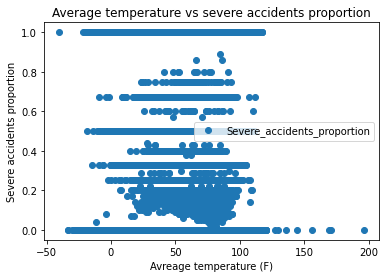

In [41]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

sub_hour.plot(x = 'Avg_temp_per_hour', y='Severe_accidents_proportion',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Average temperature vs severe accidents proportion')  
plt.xlabel('Avreage temperature (F)')  
plt.ylabel('Severe accidents proportion')  
plt.show()

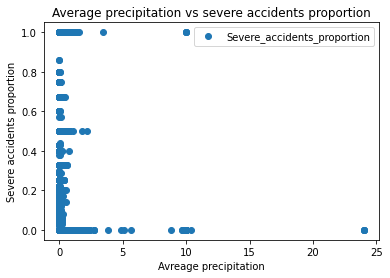

In [42]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

sub_hour.plot(x = 'Avg_precip_per_hour', y='Severe_accidents_proportion',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Average precipitation vs severe accidents proportion')  
plt.xlabel('Avreage precipitation')  
plt.ylabel('Severe accidents proportion')  
plt.show()

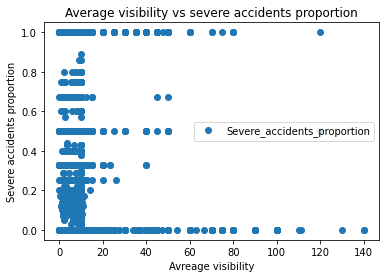

In [43]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

sub_hour.plot(x = 'Avg_visibility_per_hour', y='Severe_accidents_proportion',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Average visibility vs severe accidents proportion')  
plt.xlabel('Avreage visibility')  
plt.ylabel('Severe accidents proportion')  
plt.show()

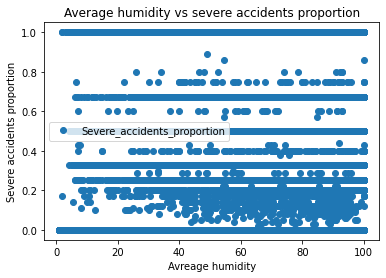

In [44]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

sub_hour.plot(x = 'Avg_humid_per_hour', y='Severe_accidents_proportion',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Average humidity vs severe accidents proportion')  
plt.xlabel('Avreage humidity')  
plt.ylabel('Severe accidents proportion')  
plt.show()

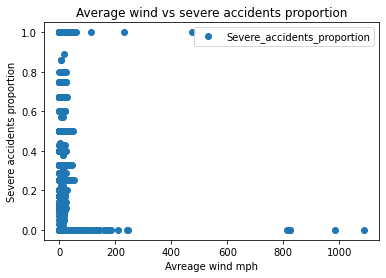

In [45]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

sub_hour.plot(x = 'Avg_windmph_per_hour', y='Severe_accidents_proportion',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Average wind vs severe accidents proportion')  
plt.xlabel('Avreage wind mph')  
plt.ylabel('Severe accidents proportion')  
plt.show()

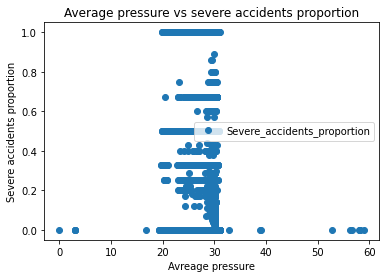

In [46]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

sub_hour.plot(x = 'Avg_pressure_per_hour', y='Severe_accidents_proportion',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Average pressure vs severe accidents proportion')  
plt.xlabel('Avreage pressure')  
plt.ylabel('Severe accidents proportion')  
plt.show()

#### We can see that there isn't anly linear relationships between these variables either, so there won't be any point in running linear regression to predict severe accidents proportion.

# 05. Multiple regression analysis

## a. Predicting City accidents per hour

In [47]:
#Deleting missing values
sub_hour=sub_hour.dropna(subset=['Avg_temp_per_hour', 'Avg_precip_per_hour', 'Avg_windmph_per_hour','Avg_pressure_per_hour' ])
sub_hour.shape

(1406405, 18)

In [48]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = sub_hour[['Avg_temp_per_hour', 'Avg_precip_per_hour']].values
y = sub_hour['City_accidents_per_hour'].values.reshape(-1,1)

In [49]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [50]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [51]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [52]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [53]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00403693 0.11548985]]
Mean squared error:  1.2447505644774026
R2 score:  0.004479328095714719


In [54]:
y_predicted

array([[1.4213045],
       [1.3879998],
       [1.311298 ],
       ...,
       [1.2870765],
       [1.4808491],
       [1.2249078]], dtype=float32)

In [55]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4,1.421304
1,1,1.388000
2,1,1.311298
3,1,1.456628
4,1,1.323812
5,1,1.456628
6,1,1.460665
7,2,1.412221
8,1,1.315335
9,2,1.449517


#### We can see that the multiple regression does a little better job at predicting the variables (R2 is higher but RMSE is also higher) , but the model is still a poor fit.

## b. Predicting severe accidents proportion

In [56]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = sub_hour[['Avg_temp_per_hour', 'Avg_precip_per_hour']].values
y = sub_hour['Severe_accidents_proportion'].values.reshape(-1,1)

In [57]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [58]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [59]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [60]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [61]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00018111  0.00532519]]
Mean squared error:  0.03485782001875242
R2 score:  0.0004283092563561741


In [62]:
y_predicted

array([[0.0373395 ],
       [0.03883365],
       [0.04227474],
       ...,
       [0.0433614 ],
       [0.03466813],
       [0.04615048]], dtype=float32)

In [63]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.0,0.037339
1,0.0,0.038834
2,0.0,0.042275
3,0.0,0.035755
4,0.0,0.041713
5,0.0,0.035755
6,0.0,0.035574
7,0.0,0.037747
8,0.0,0.042094
9,1.0,0.036914


#### We can see that this model is also a poor fit for predicting the proportion of severe accidents with an extremely low R2 and relatively high RMSE.

# 06. Multivariate polynomial regression analysis

#### It was observed that the temperature has a nonlinear impact on accidents, so we will try to make a multivariate polynomial regression model to capture this relationship

## a. Predicting city accidents number

In [64]:
#First, we create a new variable for squared temperature
sub_hour['Avg_temp_squared']=sub_hour['Avg_temp_per_hour']**2
sub_hour.head()

C:\Users\munav\AppData\Local\Temp\ipykernel_40012\1579652543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_hour['Avg_temp_squared']=sub_hour['Avg_temp_per_hour']**2


,Date,Hour,State,County,City,City_accidents_per_hour,Avg_temp_per_hour,Avg_humid_per_hour,Avg_pressure_per_hour,Avg_visibility_per_hour,Avg_windmph_per_hour,Avg_precip_per_hour,Avg_distance_per_hour,Avg_severity_per_hour,Temp_category,Severe_accidents_number,_merge,Severe_accidents_proportion,Avg_temp_squared
0,2016-01-14,20,Pennsylvania,Lehigh,Whitehall,1,31.000000,69.0,29.530001,10.0,3.0,0.00,0.061,4.0,Very Cold,1.0,both,1.0,961.000000
1,2016-02-08,1,Ohio,Franklin,Dublin,1,42.099998,58.0,29.760000,10.0,10.4,0.00,3.230,3.0,Normal,0.0,left_only,0.0,1772.409912
6,2016-02-08,8,Ohio,Hamilton,Cincinnati,1,37.000000,93.0,29.690001,10.0,10.4,0.01,0.500,3.0,Normal,0.0,left_only,0.0,1369.000000
8,2016-02-08,12,Ohio,Cuyahoga,Cleveland,1,33.099998,92.0,29.629999,0.5,3.5,0.08,0.521,2.0,Normal,0.0,left_only,0.0,1095.609863
10,2016-02-08,15,Ohio,Franklin,Westerville,1,32.000000,100.0,29.590000,0.5,3.5,0.05,0.826,2.0,Very Cold,0.0,left_only,0.0,1024.000000


In [65]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = sub_hour[['Avg_temp_per_hour','Avg_temp_squared', 'Avg_precip_per_hour']].values
y = sub_hour['City_accidents_per_hour'].values.reshape(-1,1)

In [66]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [67]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [68]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [69]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [70]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-4.351941e-03  7.380342e-05  1.263818e-01]]
Mean squared error:  1.2438060109334987
R2 score:  0.005234758625743519


In [71]:
y_predicted

array([[1.4190814],
       [1.3683721],
       [1.2897985],
       ...,
       [1.2760563],
       [1.5347816],
       [1.2651073]], dtype=float32)

In [72]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4,1.419081
1,1,1.368372
2,1,1.289798
3,1,1.483842
4,1,1.298981
5,1,1.483842
6,1,1.491963
7,2,1.404255
8,1,1.292606
9,2,1.462573


#### We can see that the model performed a bit better than the previous 2 models in terms of R2 (RMSE is higher than the 1st model), however it is still a poor fit for explaining variations in accident numbers.

## b. Predicting severe accidents proportion

In [73]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = sub_hour[['Avg_temp_per_hour','Avg_temp_squared', 'Avg_precip_per_hour']].values
y = sub_hour['Severe_accidents_proportion'].values.reshape(-1,1)

In [74]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [75]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [76]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [77]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [78]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-5.6922366e-04  3.4145387e-06  5.8292798e-03]]
Mean squared error:  0.034855518307982704
R2 score:  0.0004943123777347846


In [79]:
y_predicted

array([[0.03723665],
       [0.03792557],
       [0.04128005],
       ...,
       [0.04285154],
       [0.03716332],
       [0.04801033]], dtype=float32)

In [80]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.0,0.037237
1,0.0,0.037926
2,0.0,0.041280
3,0.0,0.037014
4,0.0,0.040564
5,0.0,0.037014
6,0.0,0.037022
7,0.0,0.037378
8,0.0,0.041042
9,1.0,0.037518


#### We can see that this model is slightly better than the previous model in terms of R2 but it is not good at predicting variations in severe accidents proportion.

# 07. Conclusion

#### The current analysis has shown that the models I've performed cannot be used to properly explain the variations in the car accidents number/severe accidents proportion. However, it does not mean that the weather conditions do not affect these variables. The control variables used in this analysis were limited, so we cannot reject the hypothesis that the weather condition affects the number of accidents/severe accidents proportion. The unwillingness of people to drive during severe weather conditions causes a bias in this analysis, leading us to think that the weather conditions don't effect the car accidents.  

# 08. Exporting data

In [82]:
sub_hour.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Severity_proportion.pkl'))